# **Adriano Carvalho Maretti**
## *2020009562*
## *List 04 - CNN Learning*

# Exploring CNN learning with TensorFlow

In this assignment we will work again with the [Fashion MNIST Dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data). This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 

A base notbook is provide for you to start. Complete the values when required, for example:
- VALUE = #ENTER YOUR VALUE; This will initialize a variable that will be used on the code.

Once you run the model at leat once without errors, try change the given hyperparameters, as number of filters, layers and neurons (units). Comment your obsevations. 

Try to modify the notebook, creating functions to show the images, together with their labels. Save the model and explored it with Netron.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [6]:
x_train.shape

(60000, 28, 28)

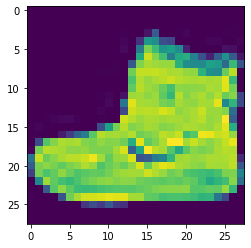

In [7]:
plt.imshow(x_train[0]);

# PreProcessing Data

Let's change the labels to categorical (it is not necessary, but it is good to explore it). PAY ATTENTION TO LOSS, when compiling.

## Labels

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

The labels are literally categories of numbers, so we will translate them to be "one hot encoded":

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_cat_test = to_categorical(y_test,10)
y_cat_test.shape

(10000, 10)

In [13]:
y_cat_train = to_categorical(y_train,10)
y_cat_train.shape

(60000, 10)

In [14]:
# verifing one sample label
print(y_train[0])
print(y_cat_train[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Processing X Data

We should normalize the X data

In [15]:
x_train.max()

255

In [16]:
x_train.min()

0

In [17]:
VALUE = 255.0

In [18]:
x_train = x_train / VALUE
x_test = x_test / VALUE

In [19]:
x_train.max()

1.0

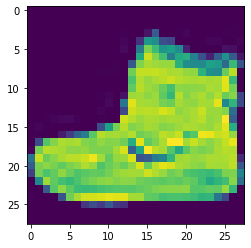

In [20]:
plt.imshow(x_train[0]);

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

For to use it with CNN, we need to add one more dimension to show we're dealing with 1 RGB channel 
- The images are in black and white, only showing values from 0-255 on a single channel, an color image would have 3 dimensions.

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

Reshaping to include channel dimension (in this case, 1 channel)

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [24]:
# batch_size, widht, height, color_channels
x_train.shape

(60000, 28, 28, 1)

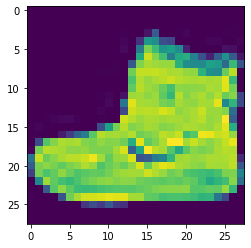

In [25]:
plt.imshow(x_train[0]);

In [26]:
x_test = x_test.reshape(10000,28,28,1)

In [27]:
x_test.shape

(10000, 28, 28, 1)

## Create Model Arquitecture and Compile

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
LAYER_ACTIVATION = 'relu'
LAST_LAYER_ACTIVATION = 'softmax'
OUTPUT_LAYER_NEURONS = 10
LOSS = 'categorical_crossentropy'
OPT = 'adam'

In [30]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(4, 4),
        input_shape=(28, 28, 1),
        activation=LAYER_ACTIVATION,
    ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=LAYER_ACTIVATION))
model.add(Dense(OUTPUT_LAYER_NEURONS, activation=LAST_LAYER_ACTIVATION))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(  optimizer=OPT,
                loss=LOSS,
                metrics=['accuracy']) 

## Train the Model

Let's add a callback, "EarlyStopping". This one of the techinics to prevent overfitting.


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
EPOCHS = 15
VAL_SPLIT = 0.1

In [35]:
history = model.fit(x_train,
                    y_cat_train,
                    epochs=EPOCHS,
                    validation_split=VAL_SPLIT,
                    callbacks=[early_stop])

Epoch 1/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.4115 - accuracy: 0.8547 - val_loss: 0.3223 - val_accuracy: 0.8810
Epoch 2/15
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2811 - accuracy: 0.8969 - val_loss: 0.2662 - val_accuracy: 0.9023
Epoch 3/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2367 - accuracy: 0.9129 - val_loss: 0.2517 - val_accuracy: 0.9072
Epoch 4/15
1688/1688 [==============================] - 16s 10ms/step - loss: 0.2038 - accuracy: 0.9241 - val_loss: 0.2451 - val_accuracy: 0.9100
Epoch 5/15
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1774 - accuracy: 0.9339 - val_loss: 0.2572 - val_accuracy: 0.9093
Epoch 6/15
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1509 - accuracy: 0.9436 - val_loss: 0.2804 - val_accuracy: 0.9068


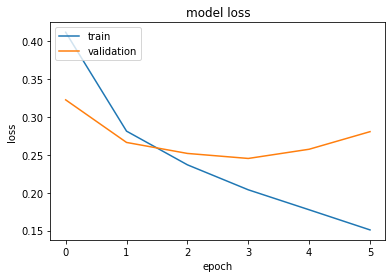

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

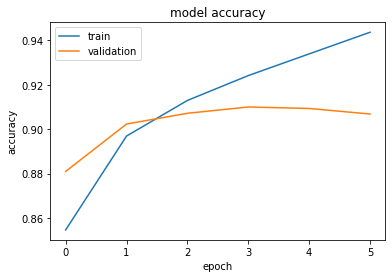

In [37]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate the Model

In [38]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.2878127098083496, 0.8991000056266785]


In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions.shape

(10000,)

In [41]:
y_cat_test.shape

(10000, 10)

In [42]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [43]:
predictions[0]

9

In [44]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.72      0.93      0.81      1000
           3       0.92      0.91      0.92      1000
           4       0.89      0.74      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.77      0.70      0.73      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [46]:
confusion_matrix(y_test,predictions)

array([[845,   0,  35,  13,   2,   2,  99,   1,   3,   0],
       [  2, 979,   1,  14,   1,   0,   2,   0,   1,   0],
       [ 10,   0, 934,   7,  24,   0,  25,   0,   0,   0],
       [ 15,   2,  26, 912,  23,   0,  20,   0,   2,   0],
       [  1,   0, 171,  23, 742,   0,  63,   0,   0,   0],
       [  0,   0,   0,   0,   0, 962,   0,  28,   0,  10],
       [ 97,   1, 131,  21,  43,   0, 702,   0,   5,   0],
       [  0,   0,   0,   0,   0,   5,   0, 986,   0,   9],
       [  2,   0,   7,   1,   0,   3,   3,   6, 978,   0],
       [  0,   0,   0,   0,   0,   6,   0,  43,   0, 951]], dtype=int64)

In [47]:
import seaborn as sns

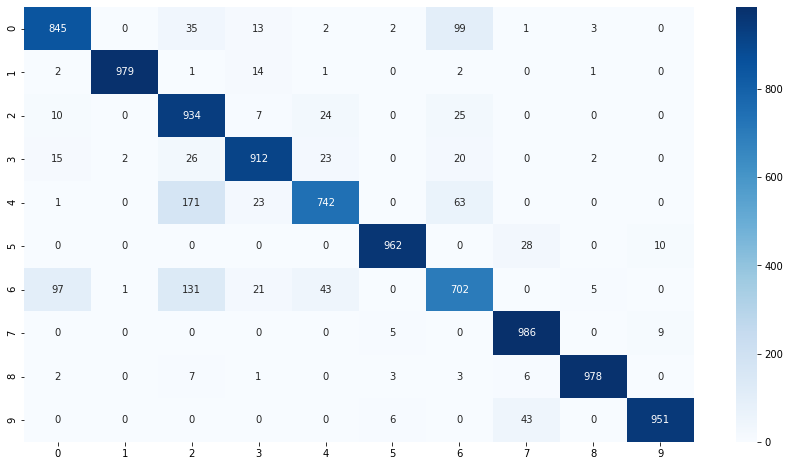

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,predictions), cmap='Blues', annot=True, fmt='g');

# Second Model
Now that the model has been executed once without errors and worked pretty fine, I'm going to build another one with different hyperparameters and some functions that will optimize the coding and execution in general.

## Print function
 This function only works after the model has been completely trained. Image is the array you want with the current position to be tested (ex: x_train\[1\]), output is the true label of that image(ex: y_cat_test\[1\]) and model is the trained AI model. **Always pass the image and the output with the same index**

In [49]:
# *This function only works after the model has been completely trained
# Image is the array you want with the current position to be tested (ex: x_train[1]) and model is the trained AI model
def print_image_with_label (image, output, model):
    processed_image = image.reshape(1, 28, 28, 1)
    img_predicted = np.argmax(model.predict(processed_image))

    expected_label = np.argmax(output)
    

    labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    print(f"Label: {labels[expected_label]} <==> Prediction: {labels[img_predicted]}")

    plt.figure(figsize=(1, 1))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

** Testing the function with the data / model trained before **

Label: Sneaker <==> Prediction: Sneaker


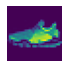

In [50]:
print_image_with_label(x_test[70], y_cat_test[70], model)

Label: Pullover <==> Prediction: Pullover


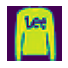

In [51]:
print_image_with_label(x_test[1], y_cat_test[1], model)

## Plot Function
A function to plot a graph that recieves the model history and the type "accuracy" and "loss" as params

In [52]:
def plot_history(history, datatype):
    if(datatype != "accuracy" and datatype != "loss"):
        print("Datatype not valid!")
        return

    plt.plot(history.history[datatype])
    plt.plot(history.history['val_' + datatype])
    plt.title('Model ' + datatype)
    plt.ylabel(datatype)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## Building the model
Putting one more Dense layer, with half the number of neurons (64) in each one of them, to test the result

In [53]:
LAYER_ACTIVATION = 'relu'
LAST_LAYER_ACTIVATION = 'softmax'
OUTPUT_LAYER_NEURONS = 10
LOSS = 'categorical_crossentropy'
OPT = 'adam'

In [54]:
second_model = Sequential([Conv2D(
                filters=32,
                kernel_size=(4, 4),
                input_shape=(28, 28, 1),
                activation=LAYER_ACTIVATION,
            ),  
            MaxPool2D(pool_size=(2, 2)), 
            Flatten(), 
            Dense(64, activation=LAYER_ACTIVATION), 
            Dense(64, activation=LAYER_ACTIVATION), 
            Dense(OUTPUT_LAYER_NEURONS, activation=LAST_LAYER_ACTIVATION)])

second_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                294976    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 300,330
Trainable params: 300,330
Non-trainable params: 0
________________________________________________

## Training
Seeing that the data is already processed and ready to be used in a model (done before the first training), let's start already with the training setups

In [55]:
EPOCHS = 10
VAL_SPLIT = 0.1

In [56]:
second_model.compile(
            optimizer=OPT,
            loss=LOSS,
            metrics=['accuracy']) 

In [57]:
early_stop2 = EarlyStopping(monitor='val_loss',patience=2)

In [58]:
second_history = second_model.fit(
                    x_train,
                    y_cat_train,
                    epochs=EPOCHS,
                    validation_split=VAL_SPLIT,
                    callbacks=[early_stop2])

Epoch 1/10
1688/1688 [==============================] - 15s 8ms/step - loss: 0.4548 - accuracy: 0.8395 - val_loss: 0.3331 - val_accuracy: 0.8782
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3077 - accuracy: 0.8885 - val_loss: 0.2900 - val_accuracy: 0.8957
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2578 - accuracy: 0.9053 - val_loss: 0.2768 - val_accuracy: 0.8997
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2276 - accuracy: 0.9152 - val_loss: 0.2903 - val_accuracy: 0.8948
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2022 - accuracy: 0.9254 - val_loss: 0.2830 - val_accuracy: 0.9027


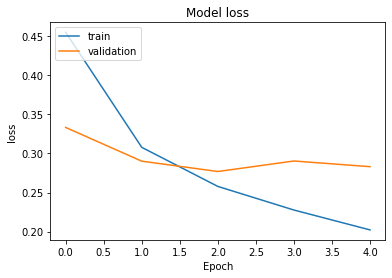

In [59]:
plot_history(second_history, "loss")

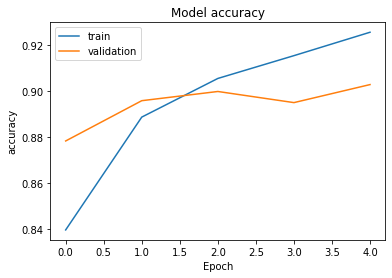

In [60]:
plot_history(second_history, "accuracy")

## Evaluate model

Label: Coat <==> Prediction: Coat


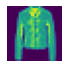



Label: Trouser <==> Prediction: Trouser


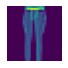



Label: Coat <==> Prediction: Coat


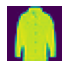



Label: Sandal <==> Prediction: Sandal


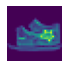

In [61]:
print_image_with_label(x_test[10], y_cat_test[10], second_model)
print("\n")
print_image_with_label(x_test[6000], y_cat_test[6000], second_model)
print("\n")
print_image_with_label(x_test[14], y_cat_test[14], second_model)
print("\n")
print_image_with_label(x_test[9999], y_cat_test[9999], second_model)

In [62]:
print(second_model.metrics_names)
print(second_model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.2867933213710785, 0.8996000289916992]


In [63]:
predictions2 = np.argmax(second_model.predict(x_test), axis=-1)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.89      0.79      0.84      1000
           3       0.85      0.95      0.90      1000
           4       0.79      0.88      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.62      0.70      1000
           7       0.92      0.99      0.95      1000
           8       0.95      0.99      0.97      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [64]:
confusion_matrix(y_test,predictions2)

array([[897,   0,   6,  27,   3,   4,  53,   0,  10,   0],
       [  1, 970,   0,  24,   3,   0,   0,   0,   2,   0],
       [ 21,   0, 791,  11, 108,   1,  58,   0,  10,   0],
       [ 14,   2,   7, 951,  10,   0,  10,   0,   6,   0],
       [  1,   1,  29,  58, 880,   0,  29,   0,   2,   0],
       [  0,   0,   0,   0,   0, 980,   0,  17,   0,   3],
       [153,   0,  50,  44, 114,   0, 621,   0,  18,   0],
       [  0,   0,   0,   0,   0,   6,   0, 986,   1,   7],
       [  1,   0,   1,   3,   1,   2,   1,   3, 988,   0],
       [  0,   0,   0,   0,   0,   6,   1,  61,   0, 932]], dtype=int64)

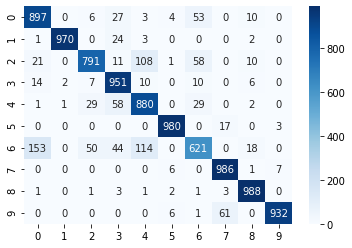

In [65]:
sns.heatmap(confusion_matrix(y_test,predictions2), cmap='Blues', annot=True, fmt='g');

# Third Model
Now, the model will have 2 Conv2D layers, one with 32 filters and one with 64 layers, and only onde Dense layer with 64 neurons

## Building the model
The activation and loss functions will be the same used in prior models

In [66]:
LAYER_ACTIVATION = 'relu'
LAST_LAYER_ACTIVATION = 'softmax'
OUTPUT_LAYER_NEURONS = 10
LOSS = 'categorical_crossentropy'
OPT = 'adam'

In [67]:
third_model = Sequential([Conv2D(
                filters=32,
                kernel_size=(4, 4),
                input_shape=(28, 28, 1),
                activation=LAYER_ACTIVATION,
            ),  
            MaxPool2D(pool_size=(2, 2)), 
            Conv2D(
                filters=64,
                kernel_size=(4, 4),
                activation=LAYER_ACTIVATION,
            ),
            MaxPool2D(pool_size=(2, 2)),
            Flatten(), 
            Dense(64, activation=LAYER_ACTIVATION), 
            Dense(OUTPUT_LAYER_NEURONS, activation=LAST_LAYER_ACTIVATION)])

third_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

## Training the model
Now, this model will use the same number of Epochs that the second model used

In [68]:
EPOCHS = 10
VAL_SPLIT = 0.1

In [69]:
third_model.compile(
            optimizer=OPT,
            loss=LOSS,
            metrics=['accuracy']) 

In [70]:
early_stop3 = EarlyStopping(monitor='val_loss',patience=2)

In [71]:
third_history = third_model.fit(
                    x_train,
                    y_cat_train,
                    epochs=EPOCHS,
                    validation_split=VAL_SPLIT,
                    callbacks=[early_stop3])

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.4990 - accuracy: 0.8190 - val_loss: 0.3917 - val_accuracy: 0.8560
Epoch 2/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.3327 - accuracy: 0.8779 - val_loss: 0.3329 - val_accuracy: 0.8810
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.2822 - accuracy: 0.8965 - val_loss: 0.2952 - val_accuracy: 0.8923
Epoch 4/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2513 - accuracy: 0.9068 - val_loss: 0.2666 - val_accuracy: 0.9022
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2277 - accuracy: 0.9153 - val_loss: 0.2689 - val_accuracy: 0.8985
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2085 - accuracy: 0.9211 - val_loss: 0.2541 - val_accuracy: 0.9088
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1905 - accuracy: 0.9296 - val_loss: 0.2810 -

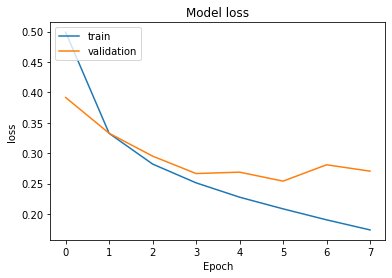

In [72]:
plot_history(third_history, "loss")

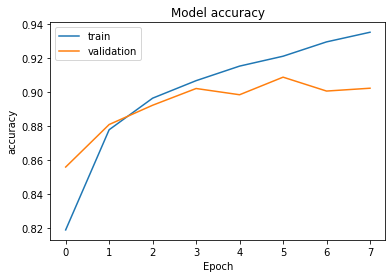

In [73]:
plot_history(third_history, "accuracy")

## Evaluating the model
And comparing it with the other two.

In [75]:
print(third_model.metrics_names)
print(third_model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.2896699905395508, 0.8978000283241272]


Label: Trouser <==> Prediction: Trouser


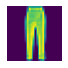



Label: Pullover <==> Prediction: Pullover


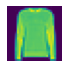



Label: Trouser <==> Prediction: Trouser


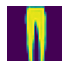



Label: Bag <==> Prediction: Bag


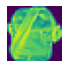

In [76]:
print_image_with_label(x_test[140], y_cat_test[140], second_model)
print("\n")
print_image_with_label(x_test[6001], y_cat_test[6001], second_model)
print("\n")
print_image_with_label(x_test[41], y_cat_test[41], second_model)
print("\n")
print_image_with_label(x_test[8888], y_cat_test[8888], second_model)

In [81]:
predictions3 = np.argmax(third_model.predict(x_test), axis=-1)
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1000
           1       1.00      0.97      0.99      1000
           2       0.89      0.77      0.83      1000
           3       0.89      0.92      0.91      1000
           4       0.80      0.89      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.69      0.75      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [82]:
confusion_matrix(y_test,predictions3)

array([[814,   0,  15,  23,   7,   2, 132,   0,   7,   0],
       [  1, 974,   0,  18,   2,   0,   3,   0,   2,   0],
       [ 11,   0, 766,  15,  95,   0, 112,   0,   1,   0],
       [ 12,   1,   5, 919,  37,   0,  24,   0,   2,   0],
       [  1,   1,  28,  24, 889,   0,  57,   0,   0,   0],
       [  0,   0,   0,   0,   0, 974,   0,  17,   1,   8],
       [ 87,   0,  41,  26,  82,   0, 749,   0,  15,   0],
       [  0,   0,   0,   0,   0,  14,   0, 981,   0,   5],
       [  2,   0,   1,   5,   4,   3,   5,   5, 975,   0],
       [  1,   0,   0,   0,   0,   5,   0,  57,   0, 937]], dtype=int64)

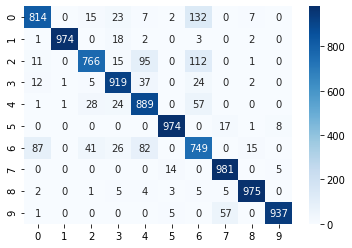

In [83]:
sns.heatmap(confusion_matrix(y_test,predictions3), cmap='Blues', annot=True, fmt='g');

In [ ]:
# Comparing the three models

# Conclusions
Now, comparing the three results, this is what I concluded:

In [84]:
accuracy_array = [
        model.evaluate(x_test,y_cat_test,verbose=0)[1], 
        second_model.evaluate(x_test,y_cat_test,verbose=0)[1], 
        third_model.evaluate(x_test,y_cat_test,verbose=0)[1]
]

loss_array= [
        model.evaluate(x_test,y_cat_test,verbose=0)[0], 
        second_model.evaluate(x_test,y_cat_test,verbose=0)[0], 
        third_model.evaluate(x_test,y_cat_test,verbose=0)[0]
]

In [85]:
accuracy_array

[0.8991000056266785, 0.8996000289916992, 0.8978000283241272]

In [88]:
loss_array

[0.2878127098083496, 0.2867933213710785, 0.2896699905395508]

In [86]:
print(f"Model number {np.argmax(accuracy_array) + 1} is the model with the greater accuracy")

Model number 2 is the model with the great accuracy


In [89]:
print(f"Model number {np.argmin(loss_array) + 1} is the model with the minor loss")

Model number 2 is the model with the least loss


## Conclusions
 - The model with the greater accuracy and minor loss is the second model, where there was only one filter layer and two dense layers with 64 neurons each 
 
 - But, all the accuracy and loss values were pretty much the same
 
 - In any of this models, you would have a AI with approximately 90% accuracy and 29% loss
 
 - It doesn't really matter how many dense or filter layers you use (as long as they're at a reasonable amount), you'll obtain simmilar results
 - At the end of the day, the key is to prevent the model of overfitting by trying to find a balance between the training and the real pratice
 